In [1]:
import numpy as np
import csv
import pandas as pd
import math

In [51]:
def print_statistics(filename):
    def read_marker_errors(file):
        with open(file, "r") as f:
            for i, line in enumerate(f):
                if line.strip() == "endheader":
                    header_line = i + 1
                    break

        df = pd.read_csv(
            file,
            sep=r'\s+',
            skiprows=header_line
        )
        return df
    

    folder_path = "../"

    df1 = read_marker_errors(folder_path + filename)
    print(df1.describe(), "\n")
    
    df1["rms_diff"] = df1["marker_error_RMS"].diff().abs()

    print("95% quantile:", df1["marker_error_RMS"].quantile(.95))
    print("marker_error_RMS mean:", df1["marker_error_RMS"].mean())
    print("rms_diff mean:", df1["rms_diff"].dropna().mean(), "\n")

    p = df1.plot(y=[1, 2, 3], title="Marker errors over time", xlabel="Frame", ylabel="Error")
    p.plot()

    p = df1.plot(y="rms_diff", title="Error difference over frames", xlabel="Frame", ylabel="Diff")
    p.plot()


             time  total_squared_error  marker_error_RMS  marker_error_max
count  690.000000           690.000000        690.000000        690.000000
mean     5.741667             0.052367          0.131702          0.167563
std      3.322169             0.008286          0.010502          0.023652
min      0.000000             0.035194          0.108311          0.116209
25%      2.870835             0.045417          0.123041          0.149537
50%      5.741665             0.052391          0.132150          0.168564
75%      8.612502             0.057921          0.138950          0.183053
max     11.483330             0.068130          0.150698          0.211642 

95% quantile: 0.1491454575
marker_error_RMS mean: 0.13170201307246376
rms_diff mean: 0.0009562059216255446 



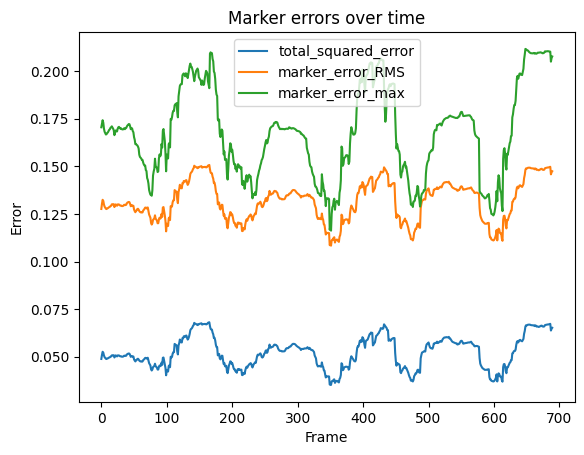

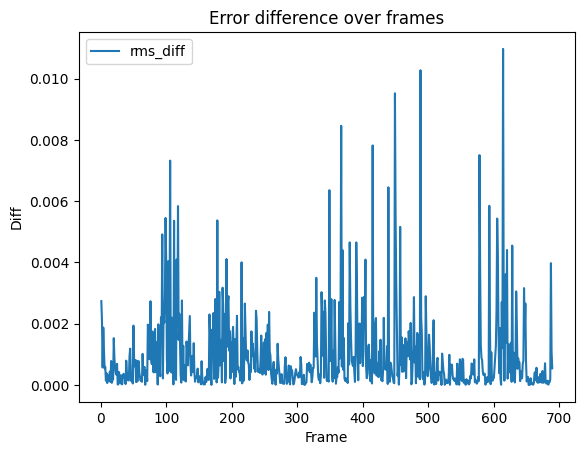

In [52]:
print_statistics("_ik_marker_errors.sto")

             time  total_squared_error  marker_error_RMS  marker_error_max
count  690.000000           690.000000        690.000000        690.000000
mean     5.741667             3.777621          1.121958          1.331682
std      3.322169             0.137281          0.020434          0.004834
min      0.000000             3.571035          1.091029          1.320891
25%      2.870835             3.635796          1.100878          1.327715
50%      5.741665             3.803749          1.126018          1.333187
75%      8.612502             3.914581          1.142305          1.335128
max     11.483330             3.965291          1.149680          1.342079 

95% quantile: 1.1461403755
marker_error_RMS mean: 1.121958105289855
rms_diff mean: 0.0005763781857764872 



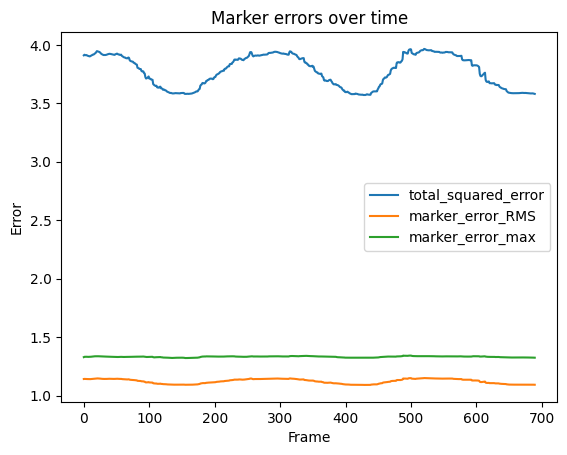

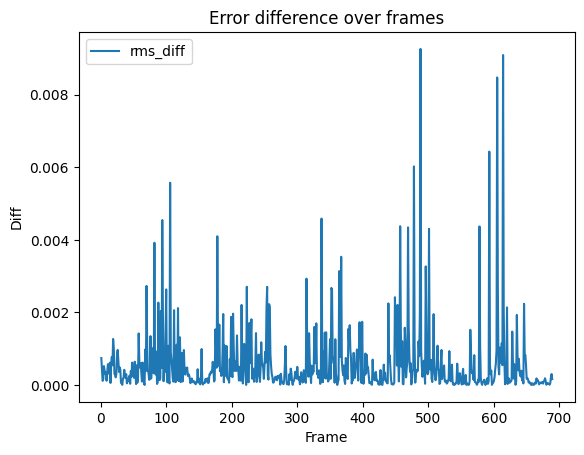

In [53]:
print_statistics("unscaled_ik_marker_errors.sto")